In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import title
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]
plt.style.use('ggplot')

### Exploring the data set

In [26]:
# Read in data
df = pd.read_csv('bookreview.csv', encoding = "ISO-8859-1", engine='python')

In [27]:
df.head()

,Id,UserName,Stars,Text,Date
0,1,PingJockey,5,"This book has controversy, but most of it stem...",8/18/2018
1,2,J.S. Bach,4,there seems to be a lot of love and hate surro...,11/15/2017
2,3,Janaka Goonasekera,2,"All ethics, decency, courtesy and fairness fal...",10/14/2018
3,4,Richard,5,"Not everything in here is pretty, good, or ple...",4/22/2017
4,5,Ludovician,1,This book takes the worst parts of the human m...,12/21/2019


In [28]:
df['Text'].values[0]

"This book has controversy, but most of it stems from reviewers that believe all people are good inside and unicorns deliver their vegan low fat cappuccino with cream. Well, most people aren't kind, and this book prepared me for reality. It doesn't teach one to be self absorbed or evil or a heretic. It teaches one to stand your ground and to protect yourself from taking unnecessary burden, unfair treatment, and manipulation from corrupt people."

In [29]:
print(df.shape)

(998, 5)


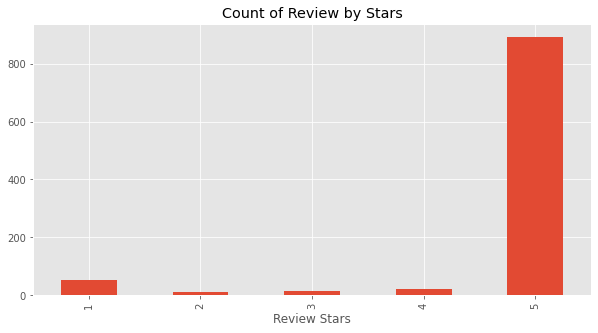

In [30]:
# to see what's the most occuring star from 1-5

ax = df['Stars'].value_counts().sort_index().plot(kind='bar', title='Count of Review by Stars',
figsize=(10,5))

ax.set_xlabel('Review Stars')
plt.show()

In [31]:
example = df['Text'][50]
print(example)

Perfect condition! Great gift!


# VADER Sentiment Scoring

we will use NLTK'S SentimentIntensityAnalyzer to the neg/nue/pos scores of the text

* This uses a "bag of words" approach:
    1. Stop words are removed (e.g The, is, are...etc).
    2. each words is scored and combined to a toal score.

```{note}
This approach doesn't account for the relationships between words - wich is in human speach is very important -
so this model might not be pretty accurate as a consequence.
```

--------------------------------------------

#### Imports

In [32]:
from tqdm.notebook import tqdm
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
# sentiment scores for the example text.
# it'll give you neg, nue, pos, and combined score.
# the combined score used to see if the overall rating of the text is positve or negative.
sid.polarity_scores(example)

{'neg': 0.0, 'neu': 0.081, 'pos': 0.919, 'compound': 0.9059}

In [34]:
# make a copy of your data set is always a good idea!
df_target = df.copy()

In [35]:
res = {} # set a dictionary to append the sentiment scores

for i, row in df_target.iterrows(): 
    text =str(row['Text']) # to make sure the text is a string, otherwise it'll give us an error
    myid = row['Id']

    res[myid] = sid.polarity_scores(text) # assigning each Id in the data set with corresponding sentiment scores based on it's text.

In [36]:
res

{1: {'neg': 0.236, 'neu': 0.641, 'pos': 0.123, 'compound': -0.924},
 2: {'neg': 0.137, 'neu': 0.749, 'pos': 0.114, 'compound': -0.8902},
 3: {'neg': 0.097, 'neu': 0.712, 'pos': 0.192, 'compound': 0.9423},
 4: {'neg': 0.08, 'neu': 0.641, 'pos': 0.279, 'compound': 0.8885},
 5: {'neg': 0.099, 'neu': 0.789, 'pos': 0.112, 'compound': 0.8838},
 6: {'neg': 0.076, 'neu': 0.763, 'pos': 0.16, 'compound': 0.9838},
 7: {'neg': 0.107, 'neu': 0.722, 'pos': 0.171, 'compound': 0.7875},
 8: {'neg': 0.017, 'neu': 0.886, 'pos': 0.097, 'compound': 0.8422},
 9: {'neg': 0.062, 'neu': 0.803, 'pos': 0.135, 'compound': 0.9895},
 10: {'neg': 0.072, 'neu': 0.85, 'pos': 0.078, 'compound': -0.4793},
 11: {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.7082},
 12: {'neg': 0.123, 'neu': 0.677, 'pos': 0.2, 'compound': 0.9775},
 13: {'neg': 0.0, 'neu': 0.473, 'pos': 0.527, 'compound': 0.7712},
 14: {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.7693},
 15: {'neg': 0.019, 'neu': 0.77, 'pos': 0.211, 'comp

In [37]:
vaders = pd.DataFrame(res).T # converting the res dictionary to a data set 
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df_target, how='left') # join the two datasets with a left join

In [38]:
vaders.head(51) 

,Id,neg,neu,pos,compound,UserName,Stars,Text,Date
0,1,0.236,0.641,0.123,-0.9240,PingJockey,5,"This book has controversy, but most of it stem...",8/18/2018
1,2,0.137,0.749,0.114,-0.8902,J.S. Bach,4,there seems to be a lot of love and hate surro...,11/15/2017
2,3,0.097,0.712,0.192,0.9423,Janaka Goonasekera,2,"All ethics, decency, courtesy and fairness fal...",10/14/2018
3,4,0.080,0.641,0.279,0.8885,Richard,5,"Not everything in here is pretty, good, or ple...",4/22/2017
4,5,0.099,0.789,0.112,0.8838,Ludovician,1,This book takes the worst parts of the human m...,12/21/2019
5,6,0.076,0.763,0.160,0.9838,EJ Lohbeck,5,"This is a controversial book, mostly because t...",9/26/2016
6,7,0.107,0.722,0.171,0.7875,megan,1,48 laws of power are 48 ways to manipulate peo...,3/28/2019
7,8,0.017,0.886,0.097,0.8422,Siddhartha,1,WOW! I was asked to purchase this book for a c...,5/21/2018
8,9,0.062,0.803,0.135,0.9895,Ramblin' Man,5,This book is a must for anyone working for the...,2/10/2020
9,10,0.072,0.850,0.078,-0.4793,Ritu K.,2,The two stars I am giving this book is because...,3/30/2020


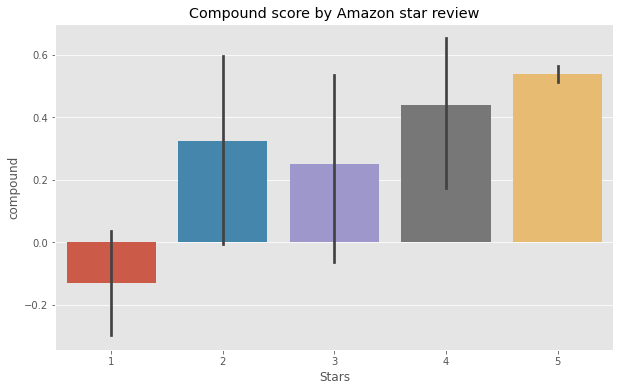

In [39]:
comp = sns.barplot(data=vaders, x='Stars', y='compound')
comp.set_title('Compound score by Amazon star review')

plt.show()

#### we can see here from the plot below that the highest star rating would have a high postive score

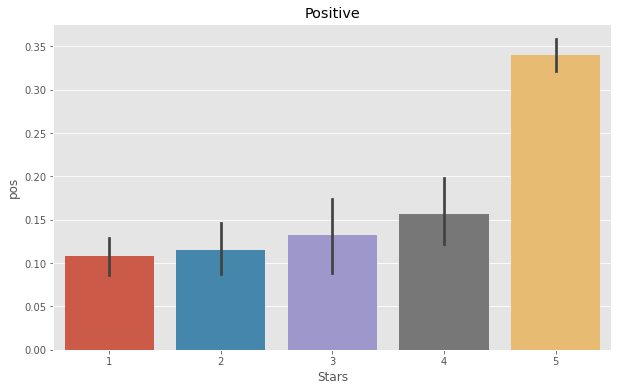

In [40]:
sns.barplot(data=vaders,x='Stars',y='pos').set_title("Positive")
plt.show()

#### everything here looks flat and normal, everything kind of nuetral

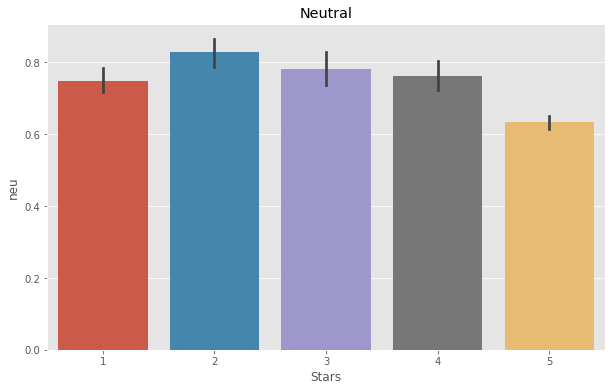

In [41]:
sns.barplot(data=vaders,x='Stars',y='neu').set_title("Neutral")
plt.show()

#### here again the lowest star count would have a high negative score.
#### but also it happens to be that 3 and 4 star rating have high negative scrores than 2,
#### so maybe the reviews with a 3 or 4 star rating got more negative comments.

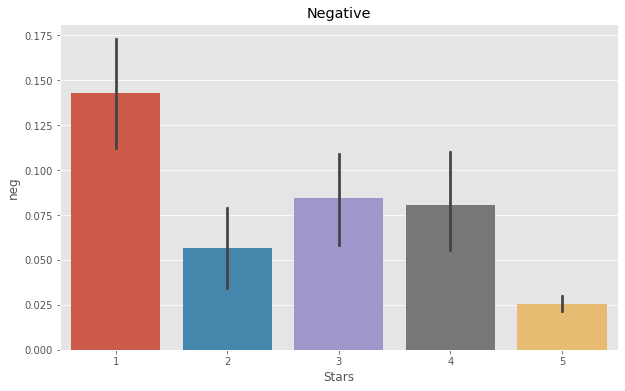

In [42]:
sns.barplot(data=vaders,x='Stars',y='neg').set_title("Negative")
plt.show()

In [ ]:
# Transforming the new data set with sentiment scores into a csv file
vaders.to_csv("SentimentAnalysis.csv",index=False ,encoding='utf-8')